In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [73]:
data = pd.read_csv('churn_data.csv')
df = data.copy()

In [74]:
df.shape

(7043, 21)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [76]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [77]:
df.columns = map(str.lower, df.columns)
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [220]:
print(f"Rows: {df.shape[0]} \n")
print(f"Features: {df.shape[1]} \n")
print(f"Missing Values: {df.isnull().values.sum()} \n")
print(f"Unique Values: {df.nunique()} \n")

Rows: 7043 

Features: 21 

Missing Values: 0 

Unique Values: customerid          7043
gender                 2
seniorcitizen          2
partner                2
dependents             2
tenure                73
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
monthlycharges      1585
totalcharges        6531
churn                  2
dtype: int64 



# **Our Data**
We have 7043 rows (each representing a unique customer) with 21 columns:     19 features, 1 target feature (Churn)
### **Target:**
- Churn (binary)
    
### **Nominal Features:**
- Tenure
- MonthlyCharges
- TotalCharges
    
### **Categorical Features:**
- Gender
- SeniorCitizen
- Dependents
- PhoneService
- MultipleLines
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- Contract
- PaperlessBilling
- PaymentMethod
    

# 1. General EDA

## 1.1 Convert 'totalcharges' to float - replace missing values

In [78]:
df.totalcharges = df.totalcharges.replace(" ", 0)
df.totalcharges = df.totalcharges.astype('float32')

## 1.2 Target Variable Distribution

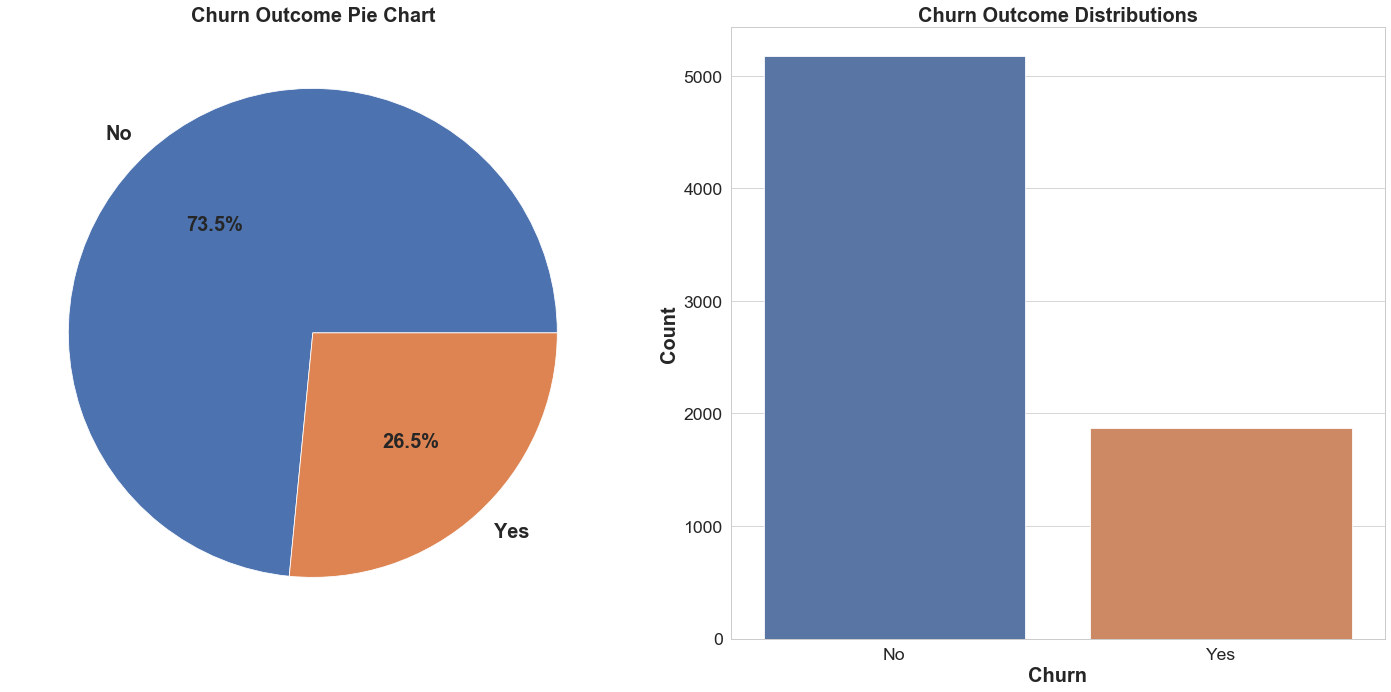

In [206]:
sns.set(style = 'whitegrid')
sns.set_context('paper', font_scale = 2)
fig = plt.figure(figsize = (20, 10))
plt.subplot(121)
plt.pie(df.churn.value_counts(), labels = labels, autopct = '%.1f%%', radius = 1, textprops={'fontsize': 20, 'fontweight': 'bold'})
plt.title('Churn Outcome Pie Chart', fontsize = 20, fontweight = 'bold')
plt.subplot(122)
t = sns.countplot(df.churn)
t.set_xlabel('Churn', fontweight = 'bold', fontsize = 20)
t.set_ylabel('Count', fontweight = 'bold', fontsize = 20)
plt.title('Churn Outcome Distributions', fontsize = 20, fontweight = 'bold')
plt.tight_layout()

# 2. Numerical Feature EDA

## 2.1 Tenure

In [257]:
numerics = df[['tenure', 'monthlycharges', 'totalcharges', 'churn']]
numerics

,tenure,monthlycharges,totalcharges,churn
0,1,29.85,29.850000,No
1,34,56.95,1889.500000,No
2,2,53.85,108.150002,Yes
3,45,42.30,1840.750000,No
4,2,70.70,151.649994,Yes
...,...,...,...,...
7038,24,84.80,1990.500000,No
7039,72,103.20,7362.899902,No
7040,11,29.60,346.450012,No
7041,4,74.40,306.600006,Yes


In [283]:
def kdeplots(feature):
    plt.figure(figsize = (20, 5))
    plt.title(f"KDE Plot: {feature}")
    ax = sns.kdeplot(df[df.churn == 'No'][feature].dropna(), label = 'No Churn', lw = 2)
    plt.legend = True
    ax1 = sns.kdeplot(df[df.churn == 'Yes'][feature].dropna(), label = 'Churn', lw = 2)

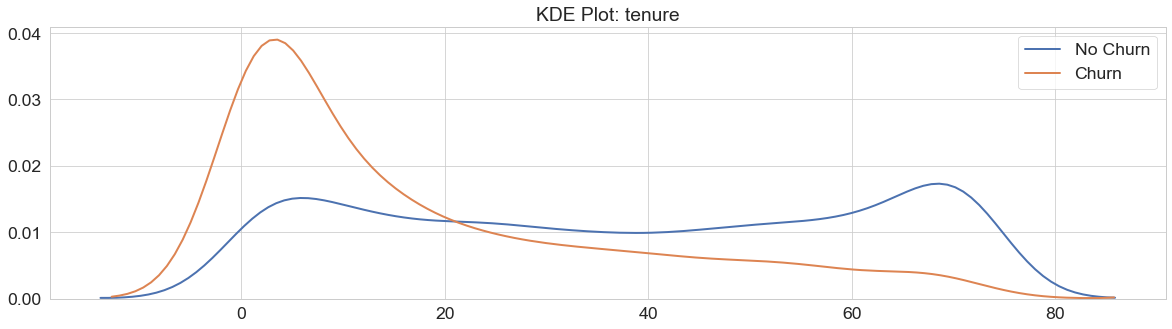

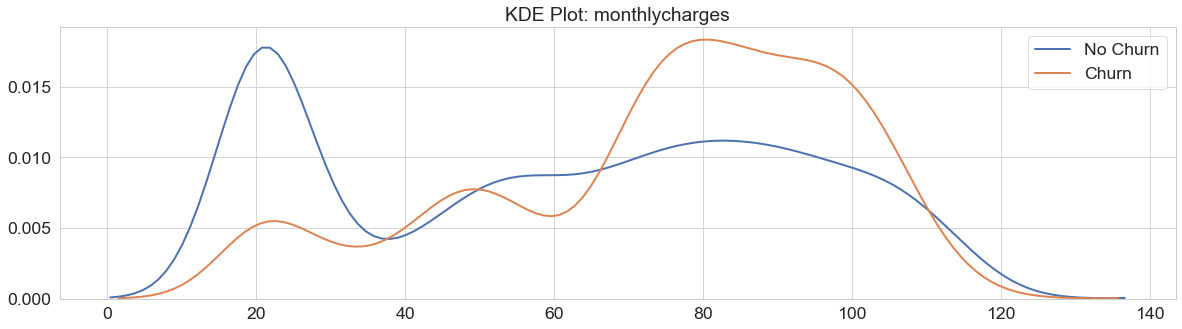

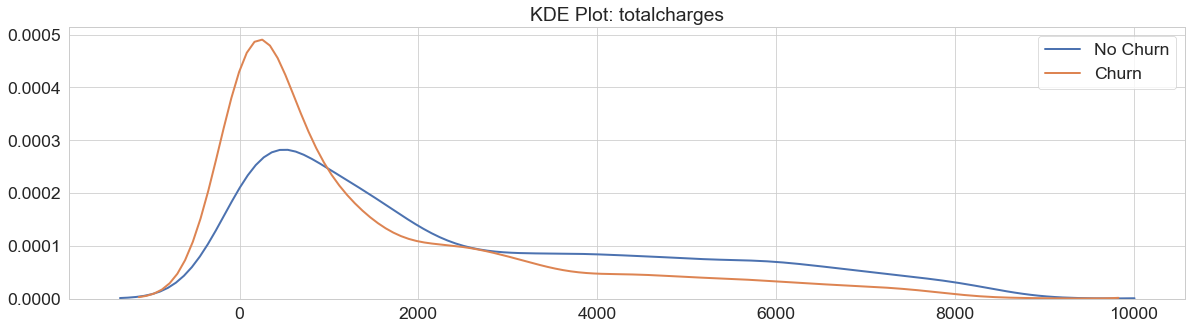

In [284]:
kdeplots('tenure')
kdeplots('monthlycharges')
kdeplots('totalcharges')

In [296]:
def histplots(feature):
    plt.figure(figsize = (20, 5))
    plt.title(f'Histogram: {feature}')
    ax = plt.hist(df[df.churn == 'No'][feature].dropna(), label = 'No Churn')
    plt.legend = True
    ax1 = plt.hist(df[df.churn == 'Yes'][feature].dropna(), label = 'Churn')

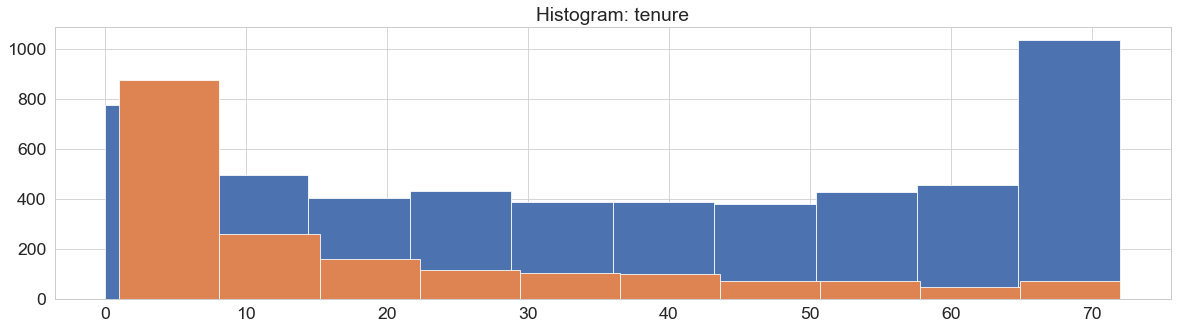

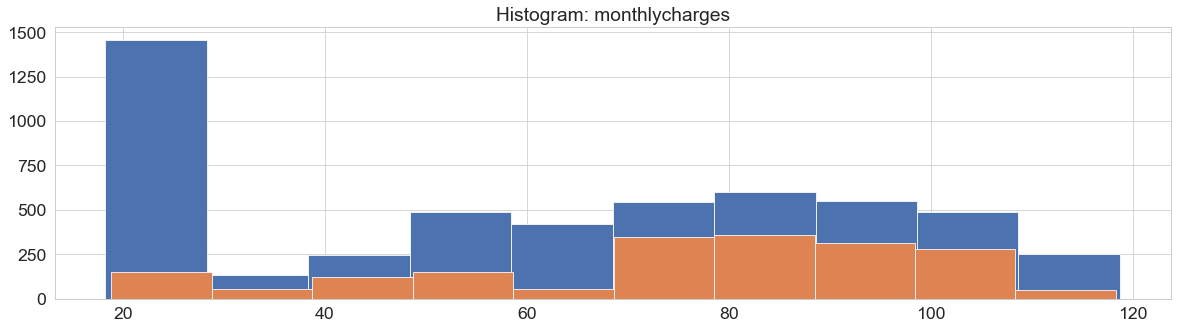

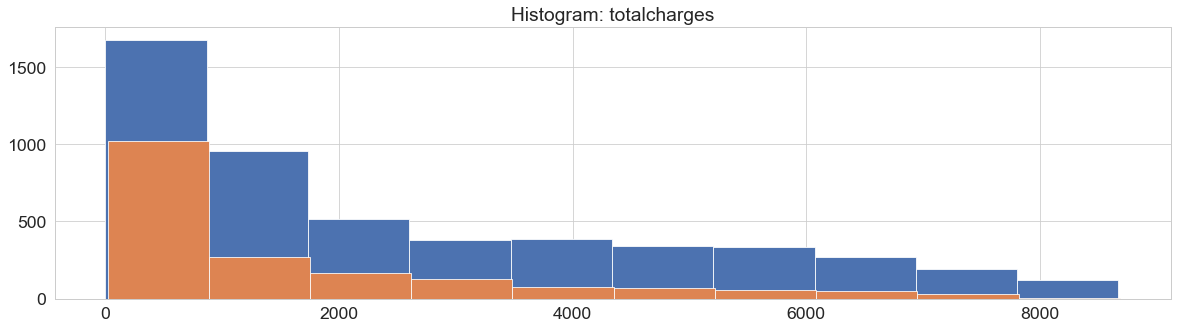

In [299]:
histplots('tenure')
histplots('monthlycharges')
histplots('totalcharges')